# SLAM frontend example

In this notebook, we will load the EuRoC dataset, and create a dead-reckoning trajectory by using the two cameras and matching ORB features.
The intent of this is to build a baseline for a SLAM system, where our next step is to refine measurements from multiple systems and create an optimized trajectory based on multiple measurements.

For the first experiment, we will use the V1_01_easy dataset.

In [8]:
import numpy as np
import cv2
import pandas as pd
import os

In [2]:
DATASET_LOCATION = "/media/saad/95237699-a090-4f1e-979d-e7bfa9412afc/datasets/euroc/vicon_room1/V1_01_easy/mav0"
CAM0 = "cam0"
CAM1 = "cam1"

We'll start with a pure visual odometry dead reckoning. We'll use both camera 0 and camera 1, extract ORB features (simple + lightweight),
use the stereo baseline to extract a depth map, then compute a relative transform from the last pose to get our new pose.

First, let's do some checks on the data.

In [23]:
# Load in camera data per timestamp.
# First, let's load in the timestamps for each camera.
# We will validate that the timestamps are identical.
CAM0_TS_PATH = os.path.join(DATASET_LOCATION, CAM0, "data.csv")
CAM1_TS_PATH = os.path.join(DATASET_LOCATION, CAM1, "data.csv")
KEY = '#timestamp [ns]'

cam0_df = pd.read_csv(CAM0_TS_PATH)
cam1_df = pd.read_csv(CAM1_TS_PATH)

ts = pd.concat([cam0_df[KEY], cam1_df[KEY]], axis=1)

# Diff the two columns, make sure they're identical
cam0_df[KEY] == cam1_df[KEY]
(cam0_df[KEY] == cam1_df[KEY]).all()

np.True_

Now, let's create a function to extract ORB features for an image. The images need to be in grayscale.

500
(500, 32)


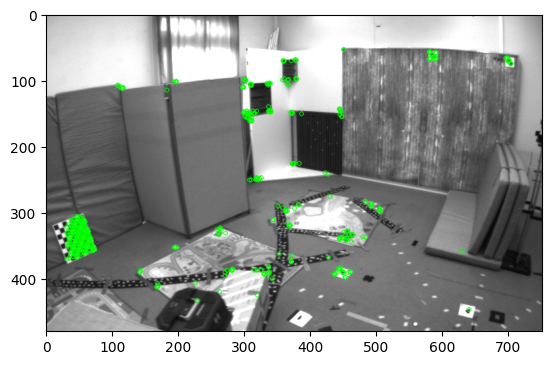

In [44]:
from matplotlib import pyplot as plt

class OrbFeatures:
    

def extract_orb_features(image: np.array, orb: 'cv2.ORB', visualize: bool = False):
    """Extract ORB keypoints and return"""
    assert len(image.shape) == 2
    kp = orb.detect(image, None)
    kp, des = orb.compute(image, kp)

    if visualize:
        viz = cv2.drawKeypoints(image, kp, None, color=(0, 255, 0), flags=0)
        plt.imshow(viz)

    return kp, des

# run on a sample image
example_img_path = os.path.join(DATASET_LOCATION, CAM0, "data", "1403715368662142976.png")
img = cv2.imread(example_img_path, cv2.IMREAD_GRAYSCALE)

kp, des = extract_orb_features(img, cv2.ORB_create(), visualize=True)


Let's now extract the keypoints for each pair of image, and match them.

In [ ]:
def match_keypoints(